In [17]:
#install the surprise 
# !pip install scikit-surprise
import os
import pandas as pd # use dataframes, for data analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import Dataset,Reader
from surprise.model_selection import cross_validate

from urllib.request import urlretrieve
import zipfile

In [18]:
#several datasets predefined in surprise, here we user ml-100k
# data is a Dataset object
# Define the data repository
data_dir = 'C:\\Users\\Le Cao Tung Lam\\PycharmProjects\\Master2-ScienceCognitive-Université.de.Lorraine\\Systèm de Récommendation\\data\\'

# Ensure the data directory exists
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Define the dataset name
dataset_name = 'ml-100k'

# Manually download the dataset zip file
zip_url = f'http://files.grouplens.org/datasets/movielens/{dataset_name}.zip'
zip_file = os.path.join(data_dir, f'{dataset_name}.zip')
urlretrieve(zip_url, zip_file)

# Unzip the contents
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

# Define the path to the dataset file
dataset_file = os.path.join(data_dir, f'{dataset_name}/u.data')

# If you want to load another dataset
df = pd.read_csv(dataset_file, sep='\t', usecols=range(3), header=None, names=('user', 'item', 'rating'))

# A reader is needed with the rating_scale param required.
reader = Reader(rating_scale=(1, 5))

# Load data into a surprise dataset
data = Dataset.load_from_df(df, reader)

C:\Users\Le Cao Tung Lam\AppData\Local\Temp\ipykernel_55852\1591004488.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([num for num in ax.get_yticks()])


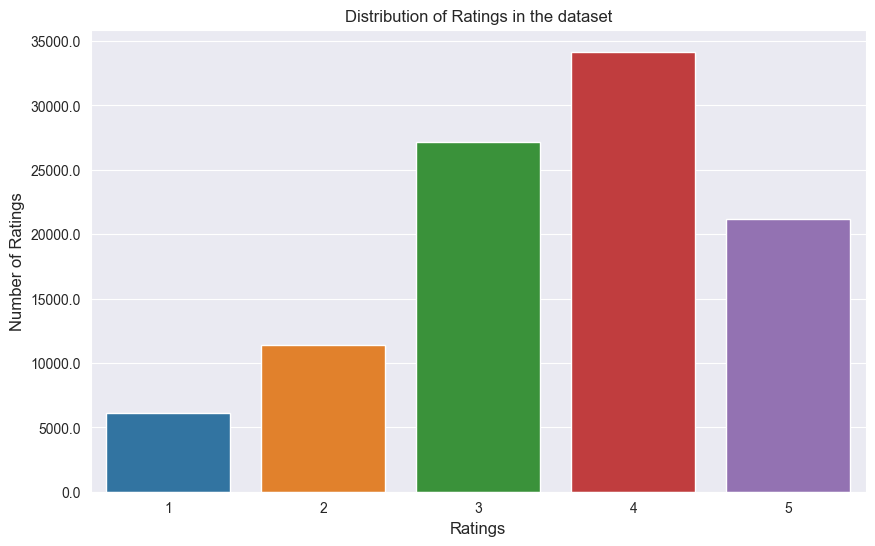

the number of ratings is 100000
the average rating value is  3.52986
sparsity is  93.69533063577546


In [19]:
# statistics about the dataset

# display the distribution of ratings
plt.figure(figsize = (10, 6))
ax = sns.countplot(x=df['rating'], data=df)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 10)
plt.title("Distribution of Ratings in the dataset", fontsize = 12)
plt.xlabel("Ratings", fontsize = 12)
plt.ylabel("Number of Ratings", fontsize = 12)
plt.show()

print("the number of ratings is",df.shape[0])
print("the average rating value is ",df['rating'].mean())
print("sparsity is ",100-(df.shape[0]/(df['item'].max()*df['user'].max())*100))



In [20]:
#collaborative filtering
#memory-based approach
from surprise import KNNBasic,KNNWithMeans,accuracy
from surprise.model_selection import train_test_split

# split dataset into 80% train and 20% test
trainset, testset=train_test_split(data, test_size=0.2)



In [21]:
#user-based Cosine
sim_options = {
    "user_based": True,  # compute  similarities between users
    "name":"cosine"
}

# With K=20 neighbors
algo = KNNBasic(sim_options=sim_options,k=20, min_k=5) #default value of k is 40
 
#cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, return_train_measures=True, verbose=True)
algo.fit(trainset) # compute similarities
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

# Let us make K change K=40
algo = KNNBasic(sim_options=sim_options,k=40, min_k=5) #default value of k is 40
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0292
MAE:  0.8127
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0209
MAE:  0.8081


0.8081355765806819

In [22]:
#user-based Pearson
sim_options = {
    "user_based": True,  # compute  similarities between users
    "name":"pearson"
}
algo = KNNWithMeans(sim_options=sim_options,k=40, min_k=5) #default value of k is 40


# 
#cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, return_train_measures=True, verbose=True)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9538
MAE:  0.7471


0.7471343292739483

In [23]:
#item-based (Cosine)
sim_options = {
    "user_based": False,  # compute  similarities between users
    "name":"cosine"
}
algo = KNNBasic(sim_options=sim_options,k=40, min_k=5) #default value of k is 40
# 
#cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, return_train_measures=True, verbose=True)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0330
MAE:  0.8149


0.8149077873492259

In [24]:
# user-based with Pearson and cross-validation
sim_options = {
    "name": "pearson",
    "user_based": True,  # compute  similarities between items
}
algo = KNNBasic(sim_options=sim_options, k=40,min_k=20)
cv=cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0272  1.0332  1.0123  1.0292  1.0377  1.0279  0.0086  
MAE (testset)     0.8161  0.8215  0.8073  0.8195  0.8245  0.8178  0.0059  
Fit time          1.05    1.06    1.07    1.06    1.07    1.06    0.01    
Test time         2.16    2.17    2.24    2.19    2.17    2.18    0.03    


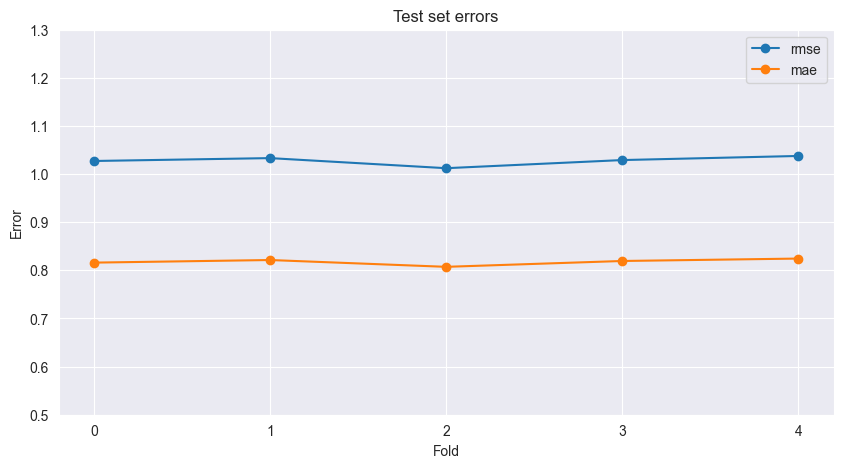

In [25]:
# Visualize
import matplotlib.pyplot as plt

rmse = cv['test_rmse']
mae = cv['test_mae']
x = np.arange(len(rmse))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x), max(x) + 2, 1.0))
plt.ylim(0.5, 1.3)
ax.plot(x, rmse, marker='o', label="rmse")
ax.plot(x, mae, marker='o', label="mae")

# Chart setup
plt.title("Test set errors", fontsize = 12)
plt.xlabel("Fold", fontsize = 10)
plt.ylabel("Error", fontsize = 10)
plt.legend()
plt.show()